In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
file_path = '/content/product_segmentation_dataset.csv'
data_df = pd.read_csv(file_path)

In [3]:
columns_to_scale = ['Price (USD)', 'Average Customer Rating', 'Units Sold', 'Stock Level', 'Discount Offered (%)','Return Rate (%)']
scaled_data_df = StandardScaler().fit_transform(data_df[columns_to_scale])

In [4]:
cluster_range = range(1, 10)
cluster_errors = []

In [5]:
for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters, random_state=42)
    clusters.fit(scaled_data_df)
    cluster_errors.append(clusters.inertia_)

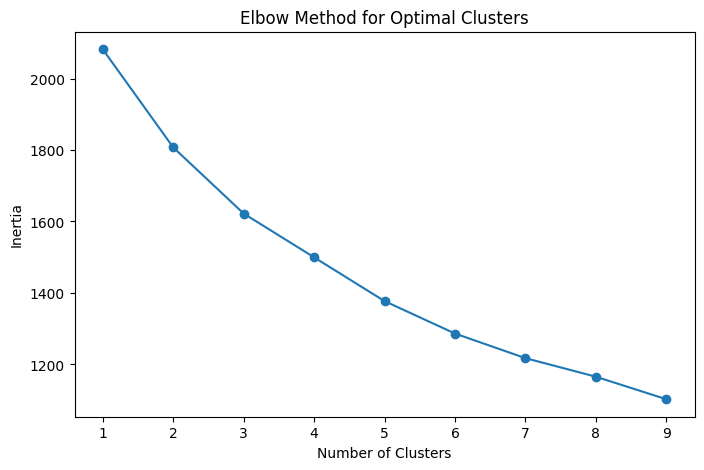

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, cluster_errors, marker="o")
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [7]:
k = 3
clusters = KMeans(n_clusters=k, random_state=42)
clusters.fit(scaled_data_df)

KMeans(n_clusters=3, random_state=42)

In [8]:
data_df['clusterid'] = clusters.labels_

In [9]:
print(data_df.head())

  Product Category  Price (USD)  Average Customer Rating  Units Sold  \
0             Desk       568.06                      3.9         199   
1              Bed      1332.68                      4.4         185   
2          Cabinet      1334.05                      4.3         212   
3             Desk       731.02                      2.6         216   
4             Sofa       752.33                      3.7         205   

   Stock Level  Discount Offered (%) Product Warranty  Return Rate (%)  \
0           38                 43.85              Yes             1.42   
1           41                 47.20              Yes             6.26   
2           54                  7.44              Yes            18.71   
3           61                 23.13              Yes            17.01   
4          104                 49.05              Yes            19.64   

   clusterid  
0          0  
1          0  
2          1  
3          2  
4          1  


In [10]:
for cluster_id in range(k):
    print(f"\nCluster {cluster_id} Data:")
    print(data_df[data_df['clusterid'] == cluster_id])


Cluster 0 Data:
    Product Category  Price (USD)  Average Customer Rating  Units Sold  \
0               Desk       568.06                      3.9         199   
1                Bed      1332.68                      4.4         185   
6            Cabinet       344.31                      2.2         199   
7               Desk       355.68                      4.6         181   
13           Cabinet       964.92                      3.3         174   
..               ...          ...                      ...         ...   
328              Bed       131.53                      3.6         173   
335          Cabinet       588.60                      3.6         182   
339            Chair      2000.00                      2.6         169   
344        Bookshelf       412.53                      3.6         183   
345            Chair      1939.91                      2.5         189   

     Stock Level  Discount Offered (%) Product Warranty  Return Rate (%)  \
0             38  